In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
def reroll(dice):
    totalRolls = dice.shape[0]
    dice['num_unique'] = dice.apply(pd.Series.nunique, axis=1)
    dice = dice [dice ['num_unique']<5]
    del dice['num_unique']
    numUniqueRolls = dice.shape[0]
    while totalRolls - numUniqueRolls > 0:
        reRollsDf = pd.DataFrame(np.random.randint(low = 1, high = 7, size=(totalRolls - numUniqueRolls,5)))
        dice = dice.append(reRollsDf)
        dice['num_unique'] = dice.apply(pd.Series.nunique, axis=1)
        dice = dice [dice ['num_unique']<5]
        del dice['num_unique']
        numUniqueRolls = dice.shape[0]
    return dice

In [51]:
class player:
    def __init__(self, numMC = 1000, playernum = 1):
        np.random.seed(playernum) #using player number as seed for reproducibility
        self.dice = pd.DataFrame(np.random.randint(low = 1, high = 7, size=(numMC,5)))
        # Need to get rid off rows with all unique dice rolls and reroll
        self.dice = reroll(self.dice)
        
        
    def dice_count(self,countOnes = True):
        ones_count = (self.dice==1).sum(axis=1)
        twos_count = (self.dice==2).sum(axis=1)
        threes_count = (self.dice==3).sum(axis=1)
        fours_count = (self.dice==4).sum(axis=1)
        fives_count = (self.dice==5).sum(axis=1)
        sixes_count = (self.dice==6).sum(axis=1)
        if countOnes == True:
            count = np.transpose(np.array([ones_count,twos_count + ones_count,\
                                           threes_count + ones_count,fours_count + ones_count,\
                                           fives_count + ones_count,sixes_count + ones_count]))
        else:
            count = np.transpose(np.array([ones_count,twos_count,threes_count,fours_count,fives_count,sixes_count]))
        count[count==5]=6 #rule where if you have 5 of the same dice (counting 1s), it is counted as 6
        return count

In [52]:
def plotDiceGraph(x,xlabel,y,ylabel,title):
    plt.scatter(x, y)
    plt.xticks(x)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

# Monte Carlo Simulation Counting Ones (1 Other Player)

In [53]:
#Game parameters
numPlayers = 1
countOnes = True
numMC = 10000

In [54]:
aggDiceCount = np.zeros((numMC,6))
for playernum in range(numPlayers):
    aggDiceCount+=player(numMC,playernum).dice_count(countOnes)
for numOutcomes in range(1,6*numPlayers+1):
    for faceValue in range(1,7):
        print("In a game with {} players, the proability of getting at least {} {}'s' is {}%"\
              .format(numPlayers, numOutcomes, faceValue,\
                      np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[faceValue-1]/numMC*100,2)))

In a game with 1 players, the proability of getting at least 1 1's' is 56.89%
In a game with 1 players, the proability of getting at least 1 2's' is 85.2%
In a game with 1 players, the proability of getting at least 1 3's' is 85.0%
In a game with 1 players, the proability of getting at least 1 4's' is 84.95%
In a game with 1 players, the proability of getting at least 1 5's' is 85.31%
In a game with 1 players, the proability of getting at least 1 6's' is 85.47%
In a game with 1 players, the proability of getting at least 2 1's' is 21.65%
In a game with 1 players, the proability of getting at least 2 2's' is 51.89%
In a game with 1 players, the proability of getting at least 2 3's' is 52.58%
In a game with 1 players, the proability of getting at least 2 4's' is 52.86%
In a game with 1 players, the proability of getting at least 2 5's' is 52.78%
In a game with 1 players, the proability of getting at least 2 6's' is 52.91%
In a game with 1 players, the proability of getting at least 3 1's

## Counting Ones

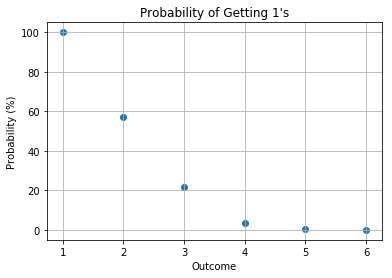

In [55]:
onesProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    onesProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[0]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',onesProb,'Probability (%)',"Probability of Getting 1's")

## Counting None One (Using 2 as a Proxy)

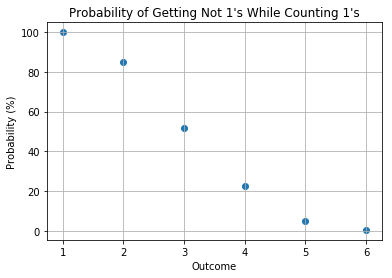

In [56]:
twosProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    twosProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[1]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',twosProb,'Probability (%)',"Probability of Getting Not 1's While Counting 1's")

# Monte Carlo Simulation Counting Ones (2 Other Players)

In [57]:
#Game parameters
numPlayers = 2
countOnes = True
numMC = 10000

In [58]:
aggDiceCount = np.zeros((numMC,6))
for playernum in range(numPlayers):
    aggDiceCount+=player(numMC,playernum).dice_count(countOnes)
for numOutcomes in range(1,6*numPlayers+1):
    for faceValue in range(1,7):
        print("In a game with {} players, the proability of getting at least {} {}'s' is {}%"\
              .format(numPlayers, numOutcomes, faceValue,\
                      np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[faceValue-1]/numMC*100,2)))

In a game with 2 players, the proability of getting at least 1 1's' is 81.47%
In a game with 2 players, the proability of getting at least 1 2's' is 97.6%
In a game with 2 players, the proability of getting at least 1 3's' is 97.81%
In a game with 2 players, the proability of getting at least 1 4's' is 97.99%
In a game with 2 players, the proability of getting at least 1 5's' is 97.81%
In a game with 2 players, the proability of getting at least 1 6's' is 97.68%
In a game with 2 players, the proability of getting at least 2 1's' is 51.2%
In a game with 2 players, the proability of getting at least 2 2's' is 88.05%
In a game with 2 players, the proability of getting at least 2 3's' is 88.18%
In a game with 2 players, the proability of getting at least 2 4's' is 88.23%
In a game with 2 players, the proability of getting at least 2 5's' is 88.18%
In a game with 2 players, the proability of getting at least 2 6's' is 88.6%
In a game with 2 players, the proability of getting at least 3 1's'

## Counting Ones

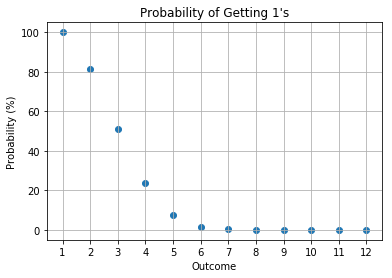

In [59]:
onesProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    onesProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[0]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',onesProb,'Probability (%)',"Probability of Getting 1's")

## Counting None One (Using 2 as a Proxy)

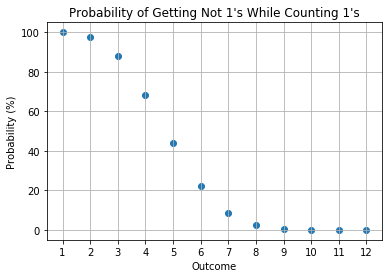

In [60]:
twosProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    twosProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[1]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',twosProb,'Probability (%)',"Probability of Getting Not 1's While Counting 1's")

# Monte Carlo Simulation Counting Ones (3 Other Players)

In [61]:
#Game parameters
numPlayers = 3
countOnes = True
numMC = 10000

In [62]:
aggDiceCount = np.zeros((numMC,6))
for playernum in range(numPlayers):
    aggDiceCount+=player(numMC,playernum).dice_count(countOnes)
for numOutcomes in range(1,6*numPlayers+1):
    for faceValue in range(1,7):
        print("In a game with {} players, the proability of getting at least {} {}'s' is {}%"\
              .format(numPlayers, numOutcomes, faceValue,\
                      np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[faceValue-1]/numMC*100,2)))

In a game with 3 players, the proability of getting at least 1 1's' is 91.67%
In a game with 3 players, the proability of getting at least 1 2's' is 99.54%
In a game with 3 players, the proability of getting at least 1 3's' is 99.67%
In a game with 3 players, the proability of getting at least 1 4's' is 99.67%
In a game with 3 players, the proability of getting at least 1 5's' is 99.67%
In a game with 3 players, the proability of getting at least 1 6's' is 99.61%
In a game with 3 players, the proability of getting at least 2 1's' is 72.69%
In a game with 3 players, the proability of getting at least 2 2's' is 97.28%
In a game with 3 players, the proability of getting at least 2 3's' is 97.59%
In a game with 3 players, the proability of getting at least 2 4's' is 97.62%
In a game with 3 players, the proability of getting at least 2 5's' is 97.56%
In a game with 3 players, the proability of getting at least 2 6's' is 97.86%
In a game with 3 players, the proability of getting at least 3 1

## Counting Ones

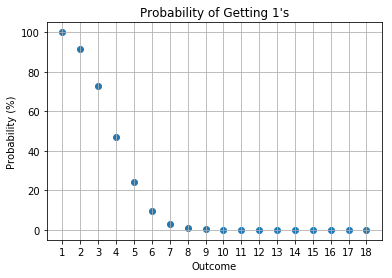

In [63]:
onesProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    onesProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[0]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',onesProb,'Probability (%)',"Probability of Getting 1's")

## Counting None One (Using 2 as a Proxy)

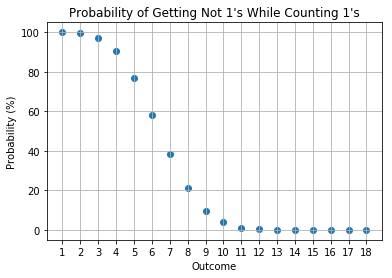

In [64]:
twosProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    twosProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[1]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',twosProb,'Probability (%)',"Probability of Getting Not 1's While Counting 1's")

# Monte Carlo Simulation Counting Ones (4 Other Players)

In [65]:
#Game parameters
numPlayers = 4
countOnes = True
numMC = 10000

In [66]:
aggDiceCount = np.zeros((numMC,6))
for playernum in range(numPlayers):
    aggDiceCount+=player(numMC,playernum).dice_count(countOnes)
for numOutcomes in range(1,6*numPlayers+1):
    for faceValue in range(1,7):
        print("In a game with {} players, the proability of getting at least {} {}'s' is {}%"\
              .format(numPlayers, numOutcomes, faceValue,\
                      np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[faceValue-1]/numMC*100,2)))

In a game with 4 players, the proability of getting at least 1 1's' is 96.55%
In a game with 4 players, the proability of getting at least 1 2's' is 99.92%
In a game with 4 players, the proability of getting at least 1 3's' is 99.98%
In a game with 4 players, the proability of getting at least 1 4's' is 99.95%
In a game with 4 players, the proability of getting at least 1 5's' is 99.98%
In a game with 4 players, the proability of getting at least 1 6's' is 99.92%
In a game with 4 players, the proability of getting at least 2 1's' is 85.33%
In a game with 4 players, the proability of getting at least 2 2's' is 99.42%
In a game with 4 players, the proability of getting at least 2 3's' is 99.57%
In a game with 4 players, the proability of getting at least 2 4's' is 99.62%
In a game with 4 players, the proability of getting at least 2 5's' is 99.56%
In a game with 4 players, the proability of getting at least 2 6's' is 99.49%
In a game with 4 players, the proability of getting at least 3 1

## Counting Ones

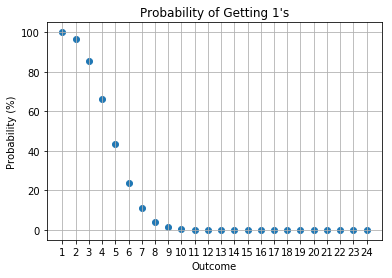

In [67]:
onesProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    onesProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[0]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',onesProb,'Probability (%)',"Probability of Getting 1's")

## Counting None One (Using 2 as a Proxy)

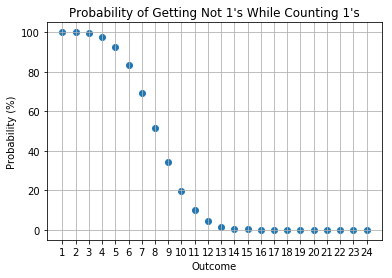

In [68]:
twosProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    twosProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[1]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',twosProb,'Probability (%)',"Probability of Getting Not 1's While Counting 1's")

# Monte Carlo Simulation Counting Ones (5 Other Players)

In [69]:
#Game parameters
numPlayers = 5
countOnes = True
numMC = 10000

In [70]:
aggDiceCount = np.zeros((numMC,6))
for playernum in range(numPlayers):
    aggDiceCount+=player(numMC,playernum).dice_count(countOnes)
for numOutcomes in range(1,6*numPlayers+1):
    for faceValue in range(1,7):
        print("In a game with {} players, the proability of getting at least {} {}'s' is {}%"\
              .format(numPlayers, numOutcomes, faceValue,\
                      np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[faceValue-1]/numMC*100,2)))

In a game with 5 players, the proability of getting at least 1 1's' is 98.64%
In a game with 5 players, the proability of getting at least 1 2's' is 99.99%
In a game with 5 players, the proability of getting at least 1 3's' is 99.99%
In a game with 5 players, the proability of getting at least 1 4's' is 99.99%
In a game with 5 players, the proability of getting at least 1 5's' is 100.0%
In a game with 5 players, the proability of getting at least 1 6's' is 99.98%
In a game with 5 players, the proability of getting at least 2 1's' is 92.24%
In a game with 5 players, the proability of getting at least 2 2's' is 99.86%
In a game with 5 players, the proability of getting at least 2 3's' is 99.96%
In a game with 5 players, the proability of getting at least 2 4's' is 99.96%
In a game with 5 players, the proability of getting at least 2 5's' is 99.93%
In a game with 5 players, the proability of getting at least 2 6's' is 99.95%
In a game with 5 players, the proability of getting at least 3 1

## Counting Ones

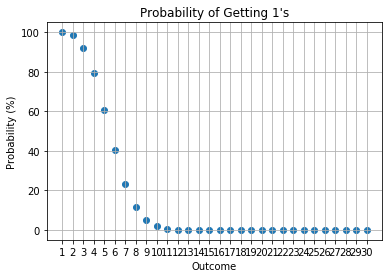

In [71]:
onesProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    onesProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[0]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',onesProb,'Probability (%)',"Probability of Getting 1's")

## Counting None One (Using 2 as a Proxy)

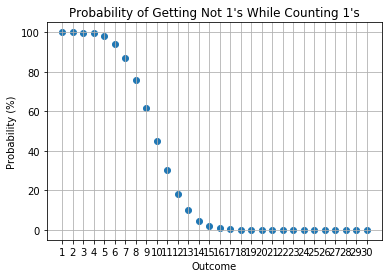

In [72]:
twosProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    twosProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[1]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',twosProb,'Probability (%)',"Probability of Getting Not 1's While Counting 1's")

# Monte Carlo Simulation Counting Ones (6 Other Players)

In [73]:
#Game parameters
numPlayers = 6
countOnes = True
numMC = 10000

In [74]:
aggDiceCount = np.zeros((numMC,6))
for playernum in range(numPlayers):
    aggDiceCount+=player(numMC,playernum).dice_count(countOnes)
for numOutcomes in range(1,6*numPlayers+1):
    for faceValue in range(1,7):
        print("In a game with {} players, the proability of getting at least {} {}'s' is {}%"\
              .format(numPlayers, numOutcomes, faceValue,\
                      np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[faceValue-1]/numMC*100,2)))

In a game with 6 players, the proability of getting at least 1 1's' is 99.41%
In a game with 6 players, the proability of getting at least 1 2's' is 100.0%
In a game with 6 players, the proability of getting at least 1 3's' is 100.0%
In a game with 6 players, the proability of getting at least 1 4's' is 100.0%
In a game with 6 players, the proability of getting at least 1 5's' is 100.0%
In a game with 6 players, the proability of getting at least 1 6's' is 100.0%
In a game with 6 players, the proability of getting at least 2 1's' is 96.09%
In a game with 6 players, the proability of getting at least 2 2's' is 99.98%
In a game with 6 players, the proability of getting at least 2 3's' is 100.0%
In a game with 6 players, the proability of getting at least 2 4's' is 100.0%
In a game with 6 players, the proability of getting at least 2 5's' is 99.99%
In a game with 6 players, the proability of getting at least 2 6's' is 99.98%
In a game with 6 players, the proability of getting at least 3 1

## Counting Ones

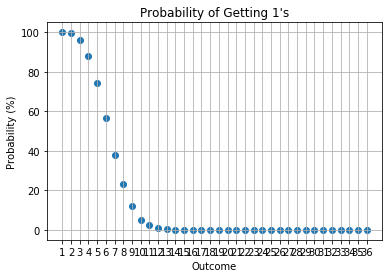

In [75]:
onesProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    onesProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[0]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',onesProb,'Probability (%)',"Probability of Getting 1's")

## Counting None One (Using 2 as a Proxy)

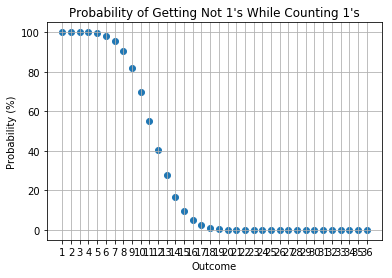

In [76]:
twosProb = np.zeros((6*numPlayers))
for numOutcomes in range(6*numPlayers):
    twosProb[numOutcomes] = np.round((aggDiceCount>=numOutcomes).sum(axis = 0)[1]/numMC*100,2)
plotDiceGraph(range(1,6*numPlayers+1),'Outcome',twosProb,'Probability (%)',"Probability of Getting Not 1's While Counting 1's")